# Masks

### Imports

In [1]:
# some_file.py
import sys
import yaml
# insert at 1, 0 is the script path (or '' in REPL)

sys.path.insert(1, '/home/jaimerz/PhD/xCell')

from xcell.mappers import MappereBOSS
from xcell.mappers import utils
from xcell.cls.data import Data
from xcell.cls.cl import Cl
from xcell.cls.cov import Cov
from astropy.io import fits
from astropy.table import Table
import pyccl as ccl
import numpy as np
import pylab as plt
import pymaster as nmt
import healpy as hp
import numpy as np

### Configurations

In [2]:
data = Data(data_path="../config_files/master.yml")

/home/jaimerz/PhD/xCell/xcell/cls/data.py:416: UserWarning: A YML file was found in outdir: ../reruns/. Using it                  instead of input config.
  warn(f'A YML file was found in outdir: {outdir}. Using it \


In [3]:
def scale_bin_map(mask, c):
    m = mask.copy()
    goodpix = mask != 0
    m[goodpix] = c
    m[~goodpix] = hp.UNSEEN
    return m

def plot_mollview(masks, labels):
    colors = ['red', 'green', 'blue', 'orange', 'pink', 'purple']
    n_masks = len(masks)
    n_labels = len(labels)
    
    if n_masks != n_labels:
        print("Masks and labels have different dimensionality")
    cbound = {'min': 0, 'max': n_masks}
    hp.mollview(badcolor='lightgray')
    for i in range(0, n_masks):
        mask = scale_bin_map(masks[i], i+1)
        hp.mollview(mask, badcolor='none',  alpha=0.5 * np.ones_like(mask),  reuse_axes=True, cbar=False, title='', **cbound)
        plt.text(2.1, 0.+0.1*i, labels[i], fontsize=15, color=colors[i], horizontalalignment='left')
    hp.graticule()
    plt.show()
    plt.close()


### SDSS

In [4]:
QSO = data.get_mapper("SDSS__QSO0")
LRG = data.get_mapper("SDSS__LRG")
ELG = data.get_mapper("SDSS__ELG")
CMASS = data.get_mapper("SDSS__CMASS")
LOWZ = data.get_mapper("SDSS__LOWZ")

In [5]:
QSO_mask = QSO.get_mask()
LRG_mask = LRG.get_mask()
ELG_mask = ELG.get_mask()
CMASS_mask = CMASS.get_mask()
LOWZ_mask = LOWZ.get_mask()

Reading ../reruns/mask_mask_QSO_0_coordC_ns512.fits.gz
Reading ../reruns/mask_mask_LRG_coordC_ns512.fits.gz
Reading ../reruns/mask_mask_ELG_coordC_ns512.fits.gz
Reading ../reruns/mask_mask_CMASS_coordC_ns512.fits.gz
Reading ../reruns/mask_mask_LOWZ_coordC_ns512.fits.gz


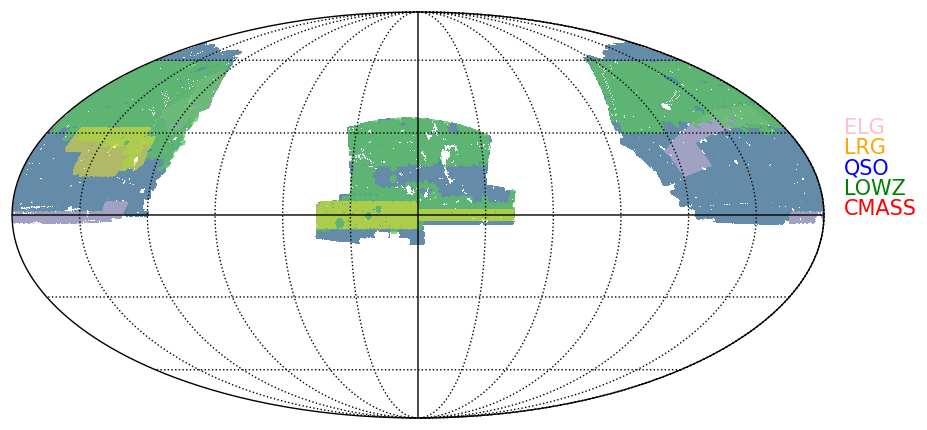

In [6]:
masks = [CMASS_mask, LOWZ_mask, QSO_mask, LRG_mask, ELG_mask]
labels = ["CMASS", "LOWZ", "QSO", "LRG", "ELG"]
plot_mollview(masks, labels)

### DES Y1

In [8]:
path = "../../cataloges/DES_Y1/redmagic_catalog/DES_Y1A1_3x2pt_redMaGiC_MASK_HPIX4096RING.fits"
DESY1gc_mask = hp.read_map(path)
DESY1gc_mask[DESY1gc_mask == hp.UNSEEN] = 0
#mask = rotate_mask(mask, self.rot)
DESY1gc_mask = hp.ud_grade(DESY1gc_mask, nside_out=512)
# Cap it
goodpix = DESY1gc_mask > 0.5
DESY1gc_mask[~goodpix] = 0

In [9]:
DESY1wl__0 = data.get_mapper("DESY1wl__0")
DESY1wl__mask = DESY1wl__0.get_mask()

Loading full cat


FileNotFoundError: [Errno 2] No such file or directory: '../../cataloges/DES_Y1/shear_catalog/mcal-y1a1-combined-riz-unblind-v4-matched.fits'

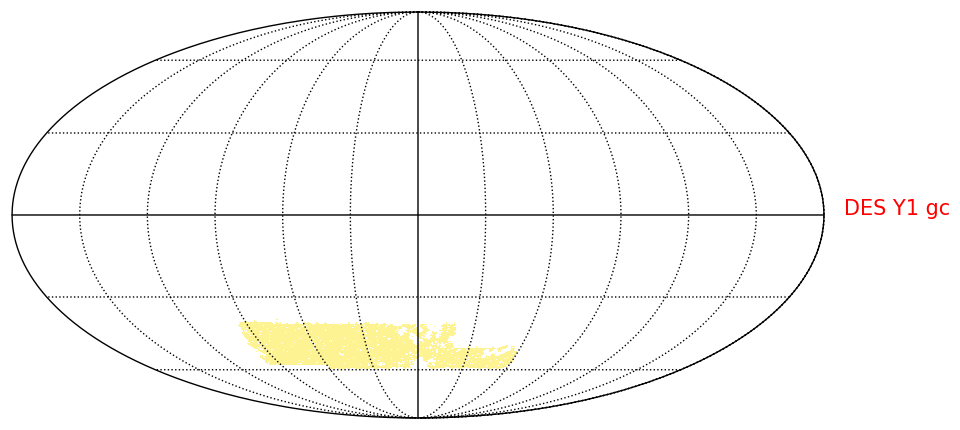

In [10]:
masks = [DESY1gc_mask]
labels = ["DES Y1 gc"]
plot_mollview(masks, labels)

### Planck